In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import glob
import netCDF4 as nc
import xarray as xr
import sys
import os
sys.path.append('/home/angel/tools/pycpt-master') 	#this makes the colors pretty.

In [10]:
from pycpt.load import cmap_from_cptcity_url, cmap_from_geo_uoregon, _cmap_name_from_path

In [13]:
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'

In [12]:
os.environ

environ{'XDG_VTNR': '7',
        'LC_PAPER': 'is_IS.UTF-8',
        'MANPATH': ':/opt/puppetlabs/puppet/share/man',
        'LC_ADDRESS': 'is_IS.UTF-8',
        'XDG_SESSION_ID': 'c2',
        'XDG_GREETER_DATA_DIR': '/var/lib/lightdm-data/angel',
        'LC_MONETARY': 'is_IS.UTF-8',
        'CLUTTER_IM_MODULE': 'xim',
        'SESSION': 'ubuntu',
        'GPG_AGENT_INFO': '/home/angel/.gnupg/S.gpg-agent:0:1',
        '_PMT_DEBUG_LEVEL': '0',
        'TERM': 'xterm-color',
        'VTE_VERSION': '4205',
        'XDG_MENU_PREFIX': 'gnome-',
        'SHELL': '/bin/bash',
        'CONDA_SHLVL': '2',
        'QT_LINUX_ACCESSIBILITY_ALWAYS_ON': '1',
        'CONDA_PROMPT_MODIFIER': '(fes) ',
        'WINDOWID': '111151861',
        'LC_NUMERIC': 'is_IS.UTF-8',
        'OLDPWD': '/home/angel',
        'UPSTART_SESSION': 'unix:abstract=/com/ubuntu/upstart-session/536214465/17673',
        'GNOME_KEYRING_CONTROL': '',
        'GTK_MODULES': 'gail:atk-bridge:unity-gtk-module',
        'USER': 

In [149]:
from datetime import datetime as dinput
import datetime as dd 
import cmocean

In [5]:
fn = "dataset-uv-rep-hourly_1556023882034.nc"

In [6]:
  ds = xr.open_dataset(fn)

In [7]:
ds

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 41, longitude: 41, time: 497)
Coordinates:
  * time       (time) datetime64[ns] 2017-08-15 ... 2017-09-15
  * depth      (depth) int16 0
  * latitude   (latitude) float32 33.125 33.375 33.625 ... 42.625 42.875 43.125
  * longitude  (longitude) float32 -77.875 -77.625 -77.375 ... -68.125 -67.875
Data variables:
    vo         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
Attributes:
    _NCProperties:            version=1|netcdflibversion=4.4.1|hdf5libversion...
    geospatial_lon_units:     degrees_east
    geospatial_vertical_max:  0.0
    title:                    Total surface and 15m velocities
    product_version:          1.0
    geospatial_lat_units:     degrees_north
    creation_date:            2019-03-22 05:43:27
    date:                     2018-12-31 00:00:00
    contact:                  servicedesk.cmems@mercator-ocean.eu
    references:               Rio,

In [8]:
  xx=ds['longitude'].values
  yy=ds['latitude'].values

In [49]:
yy

array([33.125, 33.375, 33.625, 33.875, 34.125, 34.375, 34.625, 34.875,
       35.125, 35.375, 35.625, 35.875, 36.125, 36.375, 36.625, 36.875,
       37.125, 37.375, 37.625, 37.875, 38.125, 38.375, 38.625, 38.875,
       39.125, 39.375, 39.625, 39.875, 40.125, 40.375, 40.625, 40.875,
       41.125, 41.375, 41.625, 41.875, 42.125, 42.375, 42.625, 42.875,
       43.125], dtype=float32)

In [160]:
uo=ds['uo'].values
vo=ds['vo'].values

In [161]:
tt=ds['time'].values

In [162]:
dd=ds['depth'].values

In [163]:
uu=uo[1,:,:,:]
vv=vo[1,:,:,:]

In [173]:
import pandas as pd 
ts = pd.to_datetime(tt) 
d = ts.strftime('%Y.%m.%d.%H')

In [204]:
d[1]

'2017.08.15.03'

In [115]:
u=uu.squeeze()
v=vv.squeeze()
u2 = np.sqrt(np.square(u) + np.square(v))

In [182]:
mapa=Basemap(projection='tmerc',llcrnrlon=-78,urcrnrlon=-68,llcrnrlat=33,urcrnrlat=40, lat_0=39.5, lon_0=-75.0, resolution='i')
lo,la = mapa(xx,yy)

In [183]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [184]:
cmap = _cmap_name_from_path('seismic.cpt')   #this is a local file

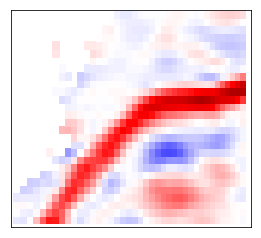

In [185]:
csv = mapa.pcolormesh(lo, la, u, vmin=-2.25, vmax=2.25, cmap=cmap)  

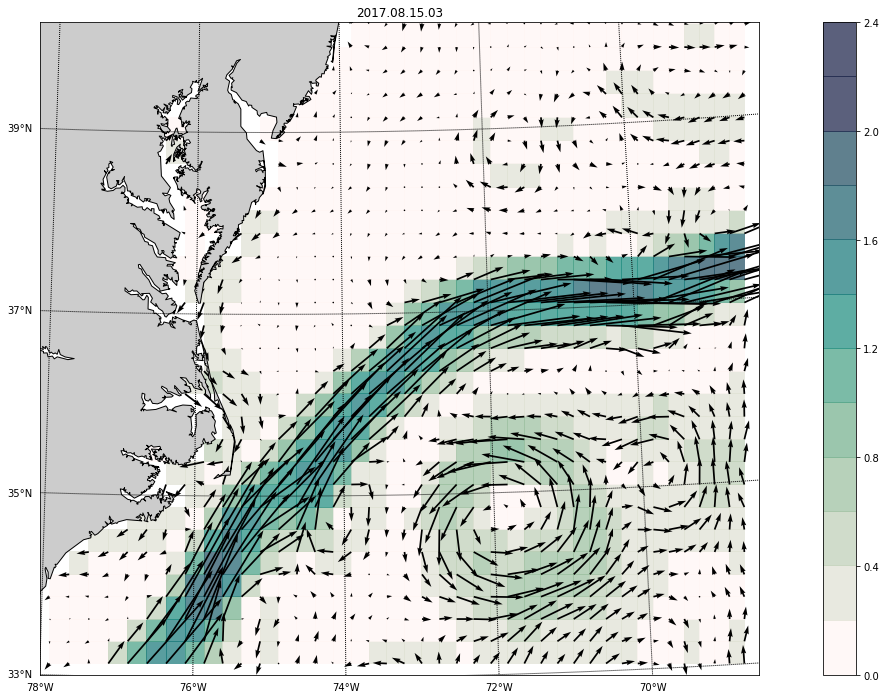

In [205]:
#mapa.quiver(lo,la,u,v,scale=2.)
from matplotlib.colors import BoundaryNorm
fig,ax=plt.subplots(1,1,figsize=(23,12))
ctempo=cmocean.cm.tempo
boundaries = np.linspace(0,2.4,13)
#cmap = plt.get_cmap('PiYG')
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
norm = BoundaryNorm(boundaries, ncolors=ctempo.N, clip=True)
mapa.pcolormesh(lo,la,u2,vmin=0, vmax=2.,cmap=ctempo,alpha=0.7,shading='flat',norm=norm)
mapa.quiver(lo,la,u,v,scale=13.)
mapa.drawcoastlines() 
mapa.fillcontinents() 
mapa.drawparallels(np.arange(int(33),int(43),2),labels=[1,0,0,0])
mapa.drawmeridians(np.arange(int(-78),int(-68),2),labels=[0,0,0,1])
ax.set_title(d[1])
plt.colorbar()   

In [191]:
ctempo

In [211]:
for count in range(1,497):
    #print(count)
    uu=uo[count,:,:,:]
    vv=vo[count,:,:,:]
    u=uu.squeeze()
    v=vv.squeeze()
    u2 = np.sqrt(np.square(u) + np.square(v))
    fig,ax=plt.subplots(1,1,figsize=(23,12))
    ctempo=cmocean.cm.tempo
    boundaries = np.linspace(0,2.4,13)
    #cmap = plt.get_cmap('PiYG')
    #norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    norm = BoundaryNorm(boundaries, ncolors=ctempo.N, clip=True)
    mapa.pcolormesh(lo,la,u2,vmin=0, vmax=2.,cmap=ctempo,alpha=0.7,shading='flat',norm=norm)
    mapa.quiver(lo,la,u,v,scale=13.)
    mapa.drawcoastlines() 
    mapa.fillcontinents() 
    mapa.drawparallels(np.arange(int(33),int(43),2),labels=[1,0,0,0])
    mapa.drawmeridians(np.arange(int(-78),int(-68),2),labels=[0,0,0,1])
    ax.set_title(d[count])
    plt.colorbar()   
    ofile = "sharp_figures/" + "geovel_" + d[count] + ".png"
    plt.savefig(ofile)
    print("saving " + ofile + "....................")
    plt.close()

saving sharp_figures/geovel_2017.08.15.03.png....................
saving sharp_figures/geovel_2017.08.15.06.png....................
saving sharp_figures/geovel_2017.08.15.09.png....................
saving sharp_figures/geovel_2017.08.15.12.png....................
saving sharp_figures/geovel_2017.08.15.15.png....................
saving sharp_figures/geovel_2017.08.15.18.png....................
saving sharp_figures/geovel_2017.08.15.21.png....................
saving sharp_figures/geovel_2017.08.15.00.png....................
saving sharp_figures/geovel_2017.08.15.03.png....................
saving sharp_figures/geovel_2017.08.15.06.png....................
saving sharp_figures/geovel_2017.08.15.09.png....................
saving sharp_figures/geovel_2017.08.15.12.png....................
saving sharp_figures/geovel_2017.08.15.15.png....................
saving sharp_figures/geovel_2017.08.15.18.png....................
saving sharp_figures/geovel_2017.08.15.21.png....................
saving sha

saving sharp_figures/geovel_2017.08.22.18.png....................
saving sharp_figures/geovel_2017.08.22.21.png....................
saving sharp_figures/geovel_2017.08.23.00.png....................
saving sharp_figures/geovel_2017.08.23.03.png....................
saving sharp_figures/geovel_2017.08.23.06.png....................
saving sharp_figures/geovel_2017.08.23.09.png....................
saving sharp_figures/geovel_2017.08.23.12.png....................
saving sharp_figures/geovel_2017.08.23.15.png....................
saving sharp_figures/geovel_2017.08.23.18.png....................
saving sharp_figures/geovel_2017.08.23.21.png....................
saving sharp_figures/geovel_2017.08.23.00.png....................
saving sharp_figures/geovel_2017.08.23.03.png....................
saving sharp_figures/geovel_2017.08.23.06.png....................
saving sharp_figures/geovel_2017.08.23.09.png....................
saving sharp_figures/geovel_2017.08.23.12.png....................
saving sha

saving sharp_figures/geovel_2017.08.30.09.png....................
saving sharp_figures/geovel_2017.08.30.12.png....................
saving sharp_figures/geovel_2017.08.30.15.png....................
saving sharp_figures/geovel_2017.08.30.18.png....................
saving sharp_figures/geovel_2017.08.30.21.png....................
saving sharp_figures/geovel_2017.08.31.00.png....................
saving sharp_figures/geovel_2017.08.31.03.png....................
saving sharp_figures/geovel_2017.08.31.06.png....................
saving sharp_figures/geovel_2017.08.31.09.png....................
saving sharp_figures/geovel_2017.08.31.12.png....................
saving sharp_figures/geovel_2017.08.31.15.png....................
saving sharp_figures/geovel_2017.08.31.18.png....................
saving sharp_figures/geovel_2017.08.31.21.png....................
saving sharp_figures/geovel_2017.08.31.00.png....................
saving sharp_figures/geovel_2017.08.31.03.png....................
saving sha

saving sharp_figures/geovel_2017.09.07.00.png....................
saving sharp_figures/geovel_2017.09.07.03.png....................
saving sharp_figures/geovel_2017.09.07.06.png....................
saving sharp_figures/geovel_2017.09.07.09.png....................
saving sharp_figures/geovel_2017.09.07.12.png....................
saving sharp_figures/geovel_2017.09.07.15.png....................
saving sharp_figures/geovel_2017.09.07.18.png....................
saving sharp_figures/geovel_2017.09.07.21.png....................
saving sharp_figures/geovel_2017.09.08.00.png....................
saving sharp_figures/geovel_2017.09.08.03.png....................
saving sharp_figures/geovel_2017.09.08.06.png....................
saving sharp_figures/geovel_2017.09.08.09.png....................
saving sharp_figures/geovel_2017.09.08.12.png....................
saving sharp_figures/geovel_2017.09.08.15.png....................
saving sharp_figures/geovel_2017.09.08.18.png....................
saving sha

In [90]:
#plt.savefig('geo.png')
plt.savefig(ofile, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [157]:
mkdir sharp_figures